In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
heart_disease <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_hungarian <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_switzerland <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))
# heart_disease_va <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# heart_disease <- rbind(heart_disease_cleveland, heart_disease_hungarian, heart_disease_switzerland, heart_disease_va) %>% 
#     mutate(cp = as_factor(cp), sex = as_factor(sex), fbs = as_factor(fbs), thal = as_factor(thal), num = as_factor(num))

In [4]:
heart_disease %>% 
    select(trestbps, chol, num)

trestbps,chol,num
<dbl>,<dbl>,<dbl>
145,233,0
160,286,2
120,229,1
130,250,0
130,204,0
120,236,0
140,268,3
120,354,0
130,254,2


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,FALSE
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,TRUE
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,TRUE
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,FALSE
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,FALSE
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,FALSE
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,TRUE
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,FALSE
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,TRUE


heart_disease,n
<lgl>,<int>
FALSE,123
TRUE,104


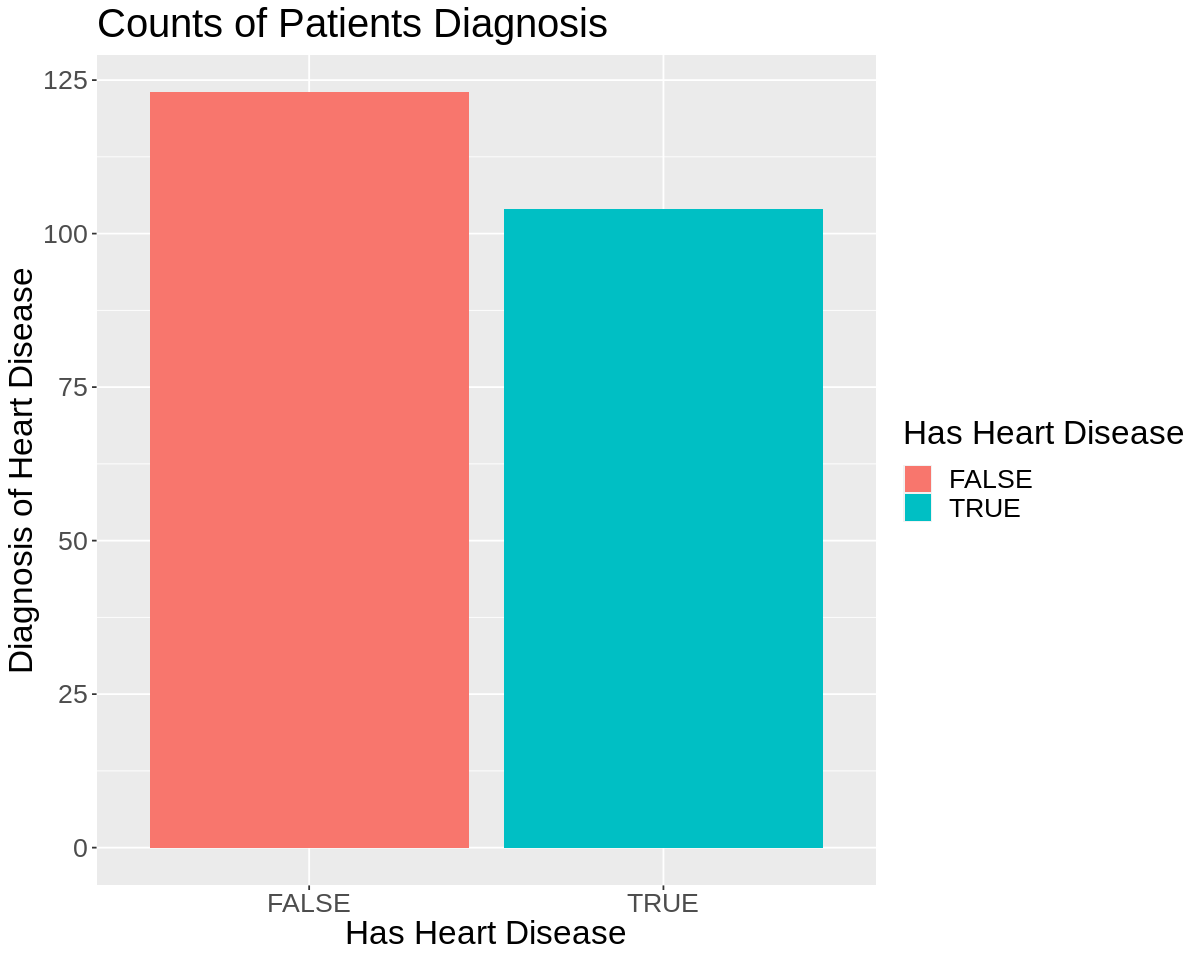

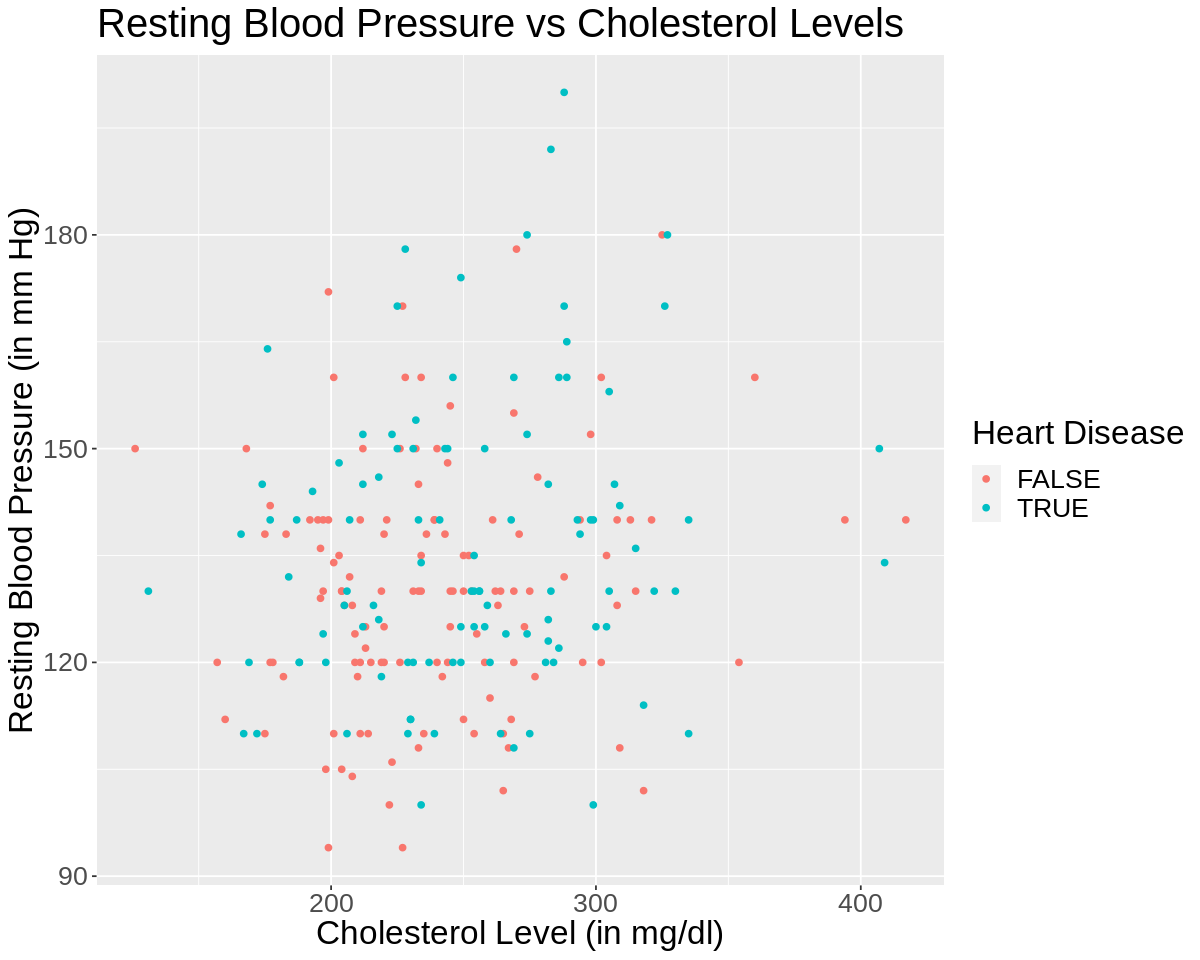

In [21]:
# resting bloood pressure and chol 
heart <- heart_disease %>% 
    mutate(heart_disease = (num != 0)) 
heart 

heart_split <- initial_split(heart, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train_summary <- heart_train %>% 
    group_by(heart_disease) %>% 
    summarize(n = n())

heart_train_summary

options(repr.plot.width = 10, repr.plot.height = 8)

heart_train_summary_plot <- ggplot(heart_train_summary, aes(x = heart_disease, y = n, fill = heart_disease)) +
    geom_bar(stat="identity") +
    labs(x = "Has Heart Disease", y = "Diagnosis of Heart Disease", fill = "Has Heart Disease", title = "Counts of Patients Diagnosis") +
    theme(text = element_text(size = 20))


heart_train_summary_plot

heart_train_plot <- ggplot(heart_train, aes(x = chol, y = trestbps, color = heart_disease)) +
    geom_point() +
    labs(x = "Cholesterol Level (in mg/dl)" , y = "Resting Blood Pressure (in mm Hg)" , color = "Heart Disease", title = "Resting Blood Pressure vs Cholesterol Levels") +
    theme(text = element_text(size = 20))

heart_train_plot